# **Exploración Preliminar archivos Google Maps**

El objetivo de este notebook es poder entender la naturaleza, formato y estructuras que contienen los archivos de metadata de Google Maps, de tal modo que nos permita posteriormente realizar un proceso de ETL para preparar el datawarehouse. El análisis se realizo en 11 archivos brindados.

## **Librerias utilizadas**

In [1]:
#AÑADIR LAS LIBRERIAS UTILIZADAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Archivo 1**

In [3]:
# Leemos el documento "uno" en formato json.
uno = pd.read_json('/content/drive/MyDrive/Final Project /Google Maps/metadata-sitios/1.json', lines=True)

# Observamos el dataframe "uno" con las columnas y los datos que contienen.
uno.sample(5)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
99939,Spark-Up Welding,"Spark-Up Welding, 6404 Bonnie Bay Cir N, Pinel...",0x88c2fbfa78f88429:0x77922d3cbabb949d,None,27.830226,-82.739087,[Welder],5.0,1,None,"[[Sunday, Open 24 hours], [Monday, Open 24 hou...",None,Open 24 hours,None,https://www.google.com/maps/place//data=!4m2!3...
70049,F45 Training Park Slope,"F45 Training Park Slope, 150 4th Ave, Brooklyn...",0x89c25b8abf7bb695:0x855b09eaf3947492,None,40.679727,-73.981836,"[Physical fitness program, Gym]",4.8,14,None,"[[Tuesday, 6AM–8:30PM], [Wednesday, 6AM–8:30PM...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 6AM,"[0x89c25bae9ce404a9:0xaa65375f518b6169, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
230922,JC's Funky Hair Ranch,"JC's Funky Hair Ranch, 22 E 3rd St, Edmond, OK...",0x87b21fb2c7a999b7:0xf905999e4fce51c7,None,35.651867,-97.480582,"[Hair salon, Beauty salon, Beauty supply store...",4.8,34,None,"[[Monday, Closed], [Tuesday, Closed], [Wednesd...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 9AM Thu,"[0x87b21fc18456f86d:0x3bb5c4d20ee9c438, 0x87b1...",https://www.google.com/maps/place//data=!4m2!3...
36166,Big Blue Swim School,"Big Blue Swim School, 6112-A Arlington Blvd, F...",0x89b7b5438a44defb:0x1d65753b95264ddc,None,38.869185,-77.143901,"[Swimming school, Baby swimming school, Indoor...",4.8,14,None,"[[Wednesday, 9AM–8PM], [Thursday, 9AM–8PM], [F...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 8PM,"[0x89b7b48dee861d2f:0x8e712ddb4581b767, 0x89b6...",https://www.google.com/maps/place//data=!4m2!3...
28105,Clark Sprayfoam,"Clark Sprayfoam, 710 Plaza Rd, Atlantic Beach,...",0x88e44b55738d1e9d:0xa739b84f93d77097,None,30.332302,-81.408999,[Insulation contractor],5.0,58,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...",None,Open 24 hours,None,https://www.google.com/maps/place//data=!4m2!3...


In [4]:
# Obtenemos la información del dataframe como los nombres de las columnas, los valores totales, si cuentan con nulos y los tipos de datos.
uno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274994 non-null  object 
 1   address           264939 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       13155 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          272740 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             13450 non-null   object 
 10  hours             192448 non-null  object 
 11  MISC              194972 non-null  object 
 12  state             195523 non-null  object 
 13  relative_results  238771 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


##**Comentarios:**
El dataframe cuenta con la columna "category" que nos parecen más relevante. Se realizó un filtrado de la columna "category" para conocer los términos englobados del rubro "steakhouse" y se contaron las filas del dataframe "uno".

In [5]:
# Creamos una variable que nos brinde las categorías separadas.
categorias = uno['category'].dropna().explode()

# Incorporamos en la variable "categorias" los valores unicos de la columna "category".
categorias = pd.Series(categorias.unique())

# Creamos una máscara que filtre los valores de "categorias" con las palabras claves para steakhouse.
mask = categorias.str.contains('steak|bistec|beef', case=False)

# Aplicamos la máscara en la variable "categorias".
categorias[mask]

1127          Cheesesteak restaurant
1752                     Steak house
2997             Japanese steakhouse
3657    French steakhouse restaurant
dtype: object

In [6]:
# Convertimos los valores de la columna "category" en str.
uno['category'] = uno['category'].astype(str)

In [7]:
# Limpiamos los valores de la columna "category" eliminando los corchetes []
uno['category'] = uno['category'].str.replace(r'\[|\]', '', regex=True)

# Definimos los términos de búsqueda
terminos_steak = ['Cheesesteak restaurant', 'Steak house', 'Japanese steakhouse', 'French steakhouse restaurant']

# Creamos una expresión con los términos de búsqueda separados por el operador "|"
patron= '|'.join(terminos_steak)

# Buscamos los términos en la columna "category"
steakhouse= uno[uno['category'].str.contains(patron, regex=True)]

# Observamos el DataFrame con los valores filtrados
steakhouse.sample(5)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
253518,Hooks Fish & Chicken Plus,"Hooks Fish & Chicken Plus, 9844 East 21st St, ...",0x886b49ad56842953:0x9979c4cba6776ae1,None,39.797359,-85.993156,"'Fried chicken takeaway', 'Cheesesteak restaur...",4.8,28,None,"[[Sunday, 11AM–10PM], [Monday, 11AM–11PM], [Tu...","{'Service options': ['Delivery', 'Takeout'], '...",Closed ⋅ Opens 11AM,None,https://www.google.com/maps/place//data=!4m2!3...
41885,Taste - by Kissing Tree Vineyards,"Taste - by Kissing Tree Vineyards, 804 S 7th S...",0x864f835e8344c381:0x583976a33e2af6a4,None,31.549649,-97.126374,"'Restaurant', 'Coffee shop', 'Steak house', 'W...",4.2,68,None,"[[Wednesday, 5–9PM], [Thursday, 5–9PM], [Frida...",{'From the business': ['Identifies as veteran-...,Permanently closed,"[0x864f8251ad61bb99:0x97db641133f8ab18, 0x864f...",https://www.google.com/maps/place//data=!4m2!3...
15890,The Valley Steakhouse,"The Valley Steakhouse, 1684 US-40, Vernal, UT ...",0x8745633eebc9fea1:0x887fcdf0dff6e8f7,None,40.442131,-109.562853,'Steak house',4.0,38,None,"[[Wednesday, 11AM–9PM], [Thursday, 11AM–9PM], ...","{'Service options': ['Curbside pickup', 'Takeo...",Closed ⋅ Opens 11AM,None,https://www.google.com/maps/place//data=!4m2!3...
80880,Hidden Creek Steakhouse,"Hidden Creek Steakhouse, 1505 Verona Caney Rd,...",0x8863a3fd695557c7:0x37b881245dfce99,None,35.478247,-86.775798,'Steak house',4.6,18,$$,"[[Monday, Closed], [Tuesday, Closed], [Wednesd...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 5PM Fri,"[0x8863a3a0d4f74403:0xe0e763f7a79d2877, 0x8863...",https://www.google.com/maps/place//data=!4m2!3...
124181,Cut & Bourbon,"Cut & Bourbon, 1600 E Randol Mill Rd, Arlingto...",0x864e8790194d8593:0x350dbdffa3b39173,"Steaks, salads, roast chicken & burgers plus p...",32.750006,-97.086593,"'Restaurant', 'Steak house'",4.2,35,None,"[[Saturday, 7AM–2PM], [Sunday, 7AM–2PM], [Mond...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 2PM ⋅ Reopens 5PM,"[0x864e7d8947b9968f:0x12b6f672156e65a2, 0x864e...",https://www.google.com/maps/place//data=!4m2!3...


In [8]:
# Contamos las filas filtradas con las palabras claves.
steakhouse.shape[0]

141

## **Archivo 2**

In [9]:
# Leemos el documento "dos" en formato json.
dos = pd.read_json('/content/drive/MyDrive/Final Project /Google Maps/metadata-sitios/2.json', lines=True)

# Observamos el dataframe "dos" con las columnas y los datos que contienen.
dos.sample(5)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
239495,Circle K,"Circle K, 930 E Roosevelt Rd, Lombard, IL 60148",0x880e4d9f946a34ff:0xaa1a7f8b463b6564,None,41.860925,-87.992971,"[Convenience store, ATM, Car wash, Coffee shop...",4.8,4,$,"[[Wednesday, Open 24 hours], [Thursday, Open 2...","{'Service options': ['Curbside pickup', 'In-st...",Open 24 hours,"[0x880e4d9f970e80c9:0x39cd9c10a57457a7, 0x880e...",https://www.google.com/maps/place//data=!4m2!3...
74431,Kittrell’s Daydream,"Kittrell’s Daydream, 10828 Co Rd 1, Fairhope, ...",0x889a3d861154bf33:0x4d5136346cd8e04f,None,30.382667,-87.858969,[Honey farm],5.0,1,None,None,None,None,"[0x8890a7530c4b0127:0x217e1ee8119ddd8c, 0x889b...",https://www.google.com/maps/place//data=!4m2!3...
84592,Knit1 Oxford,"Knit1 Oxford, 303 Heritage Dr, Oxford, MS 38655",0x88807afb910ade7f:0x8a1037b114bf4a01,None,34.365175,-89.558847,[Yarn store],5.0,3,None,"[[Tuesday, Closed], [Wednesday, 10AM–6:30PM], ...",None,Permanently closed,"[0x88807b1cb9809dbd:0x1661e431d244e729, 0x8880...",https://www.google.com/maps/place//data=!4m2!3...
39228,Hanover Fire EMS Station 7 - Mechanicsville,"Hanover Fire EMS Station 7 - Mechanicsville, 7...",0x89b1182c72592f8d:0xd34e63b1d6d0ef85,None,37.597896,-77.372035,[Fire station],5.0,8,None,"[[Friday, Open 24 hours], [Saturday, Open 24 h...",{'Accessibility': ['Wheelchair accessible entr...,Open 24 hours,"[0x89b13d33b4e326cd:0x1267764e71a606, 0x89b121...",https://www.google.com/maps/place//data=!4m2!3...
244298,"Hills Electric, LLC","Hills Electric, LLC, 2545 Lawrenceburg Rd, Fra...",0x8842744ad8674457:0x17ec3374f12eeef8,None,38.146115,-84.896402,"[Electrical installation service, Construction...",4.1,8,None,"[[Wednesday, 7:30AM–3:30PM], [Thursday, 7:30AM...",None,Closed ⋅ Opens 7:30AM Thu,"[0x884273311f336813:0xeecc5d9b99375332, 0x8842...",https://www.google.com/maps/place//data=!4m2!3...


In [10]:
# Obtenemos la información del dataframe como los nombres de las columnas, los valores totales, si cuentan con nulos y los tipos de datos.
dos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274993 non-null  object 
 1   address           265201 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       14111 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          272882 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             14401 non-null   object 
 10  hours             192124 non-null  object 
 11  MISC              197827 non-null  object 
 12  state             195942 non-null  object 
 13  relative_results  241166 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


##**Comentarios:**
El dataframe cuenta con la columna "category" que nos parecen más relevante. Se realizó un filtrado de la columna "category" para conocer los términos englobados del rubro "steakhouse" y se contaron las filas del dataframe "dos".

In [11]:
# Creamos una variable que nos brinde las categorías separadas.
categorias2= dos['category'].dropna().explode()

# Incorporamos en la variable "categorias" los valores unicos de la columna "category".
categorias2 = pd.Series(categorias2.unique())

# Creamos una máscara que filtre los valores de "categorias" con las palabras claves para steakhouse.
mask2 = categorias2.str.contains('steak|bistec|beef', case=False)

# Aplicamos la máscara en la variable "categorias".
categorias2[mask2]

824     Cheesesteak restaurant
1697       Japanese steakhouse
1869               Steak house
dtype: object

In [12]:
# Convertimos los valores de la columna "category" en str.
dos['category'] = dos['category'].astype(str)

In [13]:
# Limpiamos los valores de la columna "category" eliminando los corchetes []
dos['category'] = dos['category'].str.replace(r'\[|\]', '', regex=True)

# Definimos los términos de búsqueda
terminos_steak2 = ['Cheesesteak restaurant', 'Steak house', 'Japanese steakhouse']

# Creamos una expresión con los términos de búsqueda separados por el operador "|"
patron2= '|'.join(terminos_steak2)

# Buscamos los términos en la columna "category"
steakhouse2= dos[dos['category'].str.contains(patron2, regex=True)]

# Observamos el DataFrame con los valores filtrados
steakhouse2.sample(5)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
123763,Wassabi Asian Fusion,"Wassabi Asian Fusion, 260 Douglas Ave, Altamon...",0x88e77170e1e3f567:0xf53c8ca47a21bdf7,None,28.664252,-81.391120,"'Asian fusion restaurant', 'Asian restaurant',...",5.0,2,None,"[[Sunday, 5–10PM], [Monday, 11AM–2PM], [Tuesda...","{'Service options': ['Delivery'], 'Accessibili...",Permanently closed,None,https://www.google.com/maps/place//data=!4m2!3...
179653,Great Steak,"Great Steak, 50 Massachusetts Ave NW #39, Wash...",0x89b7b826c616b9e3:0x1fe973c76269d1cd,Sandwich chain offering grilled-to-order sirlo...,38.898114,-77.008274,"'Cheesesteak restaurant', 'American restaurant...",4.5,2,$,"[[Saturday, 9AM–9PM], [Sunday, 9AM–9PM], [Mond...","{'Service options': ['Delivery'], 'Popular for...",Permanently closed,"[0x89b7b826ca46ac31:0x8a751776bacb3428, 0x89b7...",https://www.google.com/maps/place//data=!4m2!3...
173789,The Falcon Room Supper Club & Lounge,"The Falcon Room Supper Club & Lounge, 777 Lexi...",0x8839ea92fe0fce8f:0x271c53e9addd97b1,None,40.735148,-82.532061,"'American restaurant', 'Bar', 'Lounge', 'Resta...",3.6,18,None,"[[Saturday, 4–10PM], [Sunday, Closed], [Monday...","{'Service options': ['Delivery'], 'Highlights'...",Permanently closed,"[0x8839bf77ca809efd:0x8d4705aa5d4f7a25, 0x8839...",https://www.google.com/maps/place//data=!4m2!3...
141715,Great Steak,"Great Steak, 10177 N Kings Hwy D1, Myrtle Beac...",0x880f0f00b7043d7b:0x405b2c39d160fdd5,Sandwich chain offering grilled-to-order sirlo...,33.792787,-78.766302,"'Cheesesteak restaurant', 'American restaurant...",3.5,6,$,"[[Sunday, 12–6PM], [Monday, 10AM–9PM], [Tuesda...","{'Service options': ['Takeout', 'Delivery'], '...",Permanently closed,[0x890064ed50ec6b65:0xfed654ff665aa120],https://www.google.com/maps/place//data=!4m2!3...
181845,South Station Restaurant,"South Station Restaurant, 170 S Main St # 3, R...",0x89e024604df17b0b:0xa0e181c7c8ceed1a,None,43.597040,-72.969094,'Steak house',3.7,17,None,"[[Friday, 5–9PM], [Saturday, 5–9PM], [Sunday, ...","{'Service options': ['Dine-in', 'Delivery'], '...",Permanently closed,"[0x89e0246242c64815:0xd2cea1077d7e9e15, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...


In [14]:
# Contamos las filas filtradas con las palabras claves.
steakhouse2.shape[0]

159

## **Archivo 3**

In [15]:
data = pd.read_json("/content/drive/MyDrive/Final Project /Google Maps/metadata-sitios/3.json", lines = True)
data.shape

(275001, 15)

In [16]:
pd.set_option('display.max_columns', 30)
data.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,Bumatay Jewelers,"Bumatay Jewelers, 111 W Ocean Ave, Lompoc, CA ...",0x80ec19352387c3e9:0x682efad0552e6cd4,None,34.639202,-120.458455,"[Jeweler, Jewelry designer, Jewelry repair ser...",4.6,18,None,"[[Tuesday, 10AM–6PM], [Wednesday, 10AM–6PM], [...","{'Service options': ['In-store shopping', 'Del...",Open ⋅ Closes 6PM,"[0x80ec1eca0835fc71:0xad3849d064ca46e7, 0x80ec...",https://www.google.com/maps/place//data=!4m2!3...
2,Natura,"Natura, 10744 N Stemmons Fwy, Dallas, TX 75220",0x864e9d69978f66c9:0x419f97b120ab0988,None,32.873062,-96.896274,"[Interior plant service, Business to business ...",4.5,8,None,"[[Tuesday, 8AM–5PM], [Wednesday, 8AM–5PM], [Th...",None,Closes soon ⋅ 5PM ⋅ Opens 8AM Wed,"[0x864e9d4180fe40b3:0x5e0fd37713c254bd, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...
3,Veterans Park,"Veterans Park, 6910 New York 5&20,, Bloomfield...",0x89d13b12eccb75e1:0x32b35c53a8cb1202,None,42.886783,-77.410820,[Recreation center],4.4,18,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x89d1388d4acc026f:0x30a872bfd0a4679d, 0x89d1...",https://www.google.com/maps/place//data=!4m2!3...
4,David Mac Donald Magician,"David Mac Donald Magician, 64 Plaza Ave, Renss...",0x89de09b96f7feb01:0x6617bbe4574de337,None,42.643592,-73.716346,[Magician],3.5,2,None,None,None,None,None,https://www.google.com/maps/place//data=!4m2!3...


Buscar solo los registros de la categoría steak house

In [17]:
df_filtrado = data[data['category'].apply(lambda x: any('steak' in word.lower() or 'bistec' in word.lower() or 'beef' in word.lower() for word in x) if isinstance(x, list) else False)]
df_filtrado.shape

(148, 15)

In [18]:
df_filtrado.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
3017,Goldcrest Portobellos,"Goldcrest Portobellos, 103 US-206, Sandyston, ...",0x89c3678a51dfd747:0xad3c65470d37395c,None,41.198282,-74.803301,"[Italian restaurant, French steakhouse restaur...",4.6,38,None,"[[Tuesday, Closed], [Wednesday, 4–10PM], [Thur...","{'Service options': ['Outdoor seating', 'Curbs...",Closed ⋅ Opens 4PM Wed,None,https://www.google.com/maps/place//data=!4m2!3...
3415,Spiro's,"Spiro's, 179 Rockland Rd, Roscoe, NY 12776",0x89dc9c2e525afdeb:0xad743129c41b37ae,None,41.948369,-74.911872,[Steak house],4.6,28,None,None,"{'Service options': ['Delivery'], 'Amenities':...",None,"[0x89dc9c2fbce5cb39:0xdeb69a92e40b5ea0, 0x89dc...",https://www.google.com/maps/place//data=!4m2!3...
8372,Claudio's Bistro,"Claudio's Bistro, 206 A S Main St, Woodruff, S...",0x88579176574bef91:0xf48bc62bb54ff2a4,None,34.738456,-82.036638,[Steak house],4.4,68,None,"[[Tuesday, 11AM–10PM], [Wednesday, 11AM–10PM],...","{'Service options': ['Curbside pickup', 'Takeo...",Closed ⋅ Opens 11AM,None,https://www.google.com/maps/place//data=!4m2!3...
12354,Steak UP - Brazilian Fast Casual,"Steak UP - Brazilian Fast Casual, Florida Mall...",0x88e77dfa505abf4d:0x498230001a994e64,None,28.447352,-81.394356,"[Steak house, Grill, Brazilian restaurant, Mea...",4.3,47,None,"[[Tuesday, 11AM–8PM], [Wednesday, 11AM–8PM], [...","{'Service options': ['Curbside pickup', 'No-co...",Closed ⋅ Opens 11AM,None,https://www.google.com/maps/place//data=!4m2!3...
14048,Western Sizzlin Steak & More,"Western Sizzlin Steak & More, 815 S Kerr Blvd,...",0x87ca6b5947594095:0x6e177822e4152ac8,"Casual, long-running chain offering a menu of ...",35.451614,-94.806562,[Steak house],3.2,28,$$,"[[Tuesday, 10:45AM–9PM], [Wednesday, 10:45AM–9...","{'Service options': ['Delivery'], 'Highlights'...",Permanently closed,"[0x87ca6b5914e2b75d:0x5a1e4918997798d6, 0x87ca...",https://www.google.com/maps/place//data=!4m2!3...


Ver valores nulos

In [19]:
df_filtrado.isna().sum()

name                 0
address              0
gmap_id              0
description         94
latitude             0
longitude            0
category             0
avg_rating           0
num_of_reviews       0
price               95
hours               22
MISC                 3
state               22
relative_results    37
url                  0
dtype: int64

Se usa el metodo describe() para obtener una descripción estadística de algunas columnas. En este caso se observa que el promedio de numero de reseñas es de 31, y el registro con mas reseñas es de 157. El promedio de rating es de 3.9

In [20]:
df_filtrado.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,148.000000,148.000000,148.000000,148.000000
mean,37.833508,-91.960374,3.959459,31.148649
std,5.404149,17.732687,0.646165,26.913155
min,21.292635,-157.937689,1.600000,1.000000
25%,34.219815,-97.774157,3.600000,8.000000
50%,39.162639,-87.801785,4.100000,25.500000
75%,41.257641,-77.000886,4.400000,45.000000
max,61.173217,-70.787530,5.000000,157.000000


Explorar los Outliers en la columna num_of_reviews. Solo dos restaurantes tienen cantidades de reseñas mas grande que el promedio.

In [21]:
mean = df_filtrado['num_of_reviews'].mean()
std = df_filtrado['num_of_reviews'].std()

threshold = 3 * std
outliers = (df_filtrado['num_of_reviews'] < (mean - threshold)) | (df_filtrado['num_of_reviews'] > (mean + threshold))

outliers_reviews = df_filtrado[outliers]
outliers_reviews

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
37408,Parrilla Bar & Restaurant,"Parrilla Bar & Restaurant, 5 White St, Danbury...",0x89e7ff656329c20b:0xf3612064768cd7e8,None,41.396850,-73.452906,"[Latin American restaurant, Lounge, Restaurant...",4.5,144,None,"[[Monday, Closed], [Tuesday, Closed], [Wednesd...","{'Service options': ['Curbside pickup', 'Takeo...",Closed ⋅ Opens 4PM Wed,"[0x89e7ff706aed9021:0xdeb724c6f1631f5f, 0x89e7...",https://www.google.com/maps/place//data=!4m2!3...
54576,Carmelo's Taco Place,"Carmelo's Taco Place, 2746 W 59th St, Chicago,...",0x880e2fa7a6b738b7:0x48ac43d6010941ea,None,41.786584,-87.692944,"[Restaurant, Bar, Bar & grill, Bar tabac, Burr...",4.4,157,$,"[[Sunday, 8AM–10PM], [Monday, 9AM–11PM], [Tues...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 10PM,"[0x880e31c85ef970df:0x338850cbc7bcd039, 0x880e...",https://www.google.com/maps/place//data=!4m2!3...


Crear una nueva columna con las abreviaturas de las ciudades

In [22]:
df_filtrado['city'] = df_filtrado['address'].str.rsplit().str[-2]

<ipython-input-22-ac1841a223b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['city'] = df_filtrado['address'].str.rsplit().str[-2]


In [23]:
df_filtrado["city"].unique()

array(['NJ', 'NY', 'SC', 'FL', 'OK', 'WV', 'TX', 'CA', 'CO', 'OH', 'VA',
       'MD', 'IL', 'CT', 'DC', 'PA', 'MI', 'WI', 'SD', 'MS', 'AR', 'AZ',
       'GA', 'UT', 'NE', 'MO', 'HI', 'IA', 'ID', 'NV', 'IN', 'MA', 'KS',
       'OR', 'NC', 'AK', 'NH', 'AL'], dtype=object)

Grafico de las diez ciudades con mas restaurantes

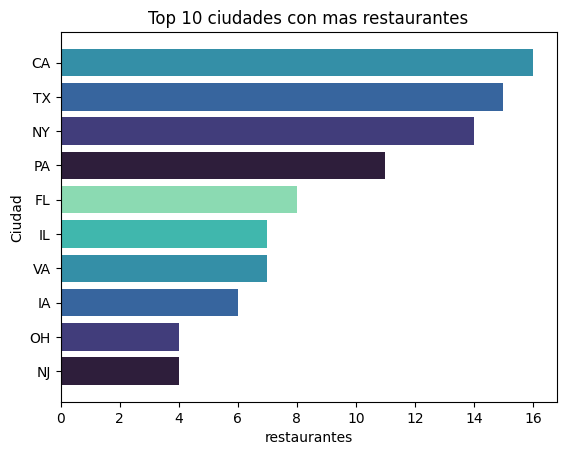

In [24]:
value_counts = df_filtrado["city"].value_counts().head(10).sort_values(ascending=True)

plt.barh(value_counts.index, value_counts.values, color=sns.color_palette("mako"))

plt.xlabel("restaurantes")
plt.ylabel("Ciudad")
plt.title("Top 10 ciudades con mas restaurantes")

plt.show()

El siguiente grafico muestra los restaurantes con mas reseñas.

In [25]:
restaurantes_con_mas_reseñas = df_filtrado.groupby("name")["num_of_reviews"].max().nlargest(10).sort_values(ascending=True)

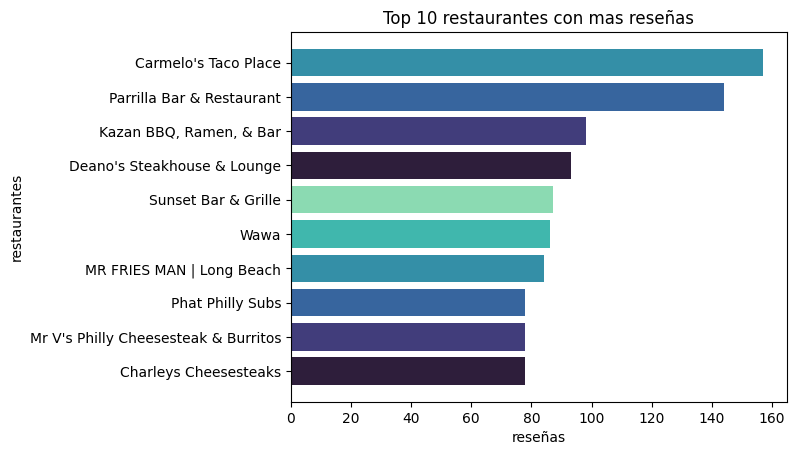

In [26]:
plt.barh(restaurantes_con_mas_reseñas.index, restaurantes_con_mas_reseñas.values, color=sns.color_palette("mako"))

plt.xlabel("reseñas")
plt.ylabel("restaurantes")
plt.title("Top 10 restaurantes con mas reseñas")
plt.show()

Consultar los restaurantes con mejor rating

In [27]:
df_rating = df_filtrado[df_filtrado['avg_rating'].isin([4.5, 5])]
df_rating.shape

(10, 16)

Grafico de los servicios mas comunes en los restaurantes con mejor rating

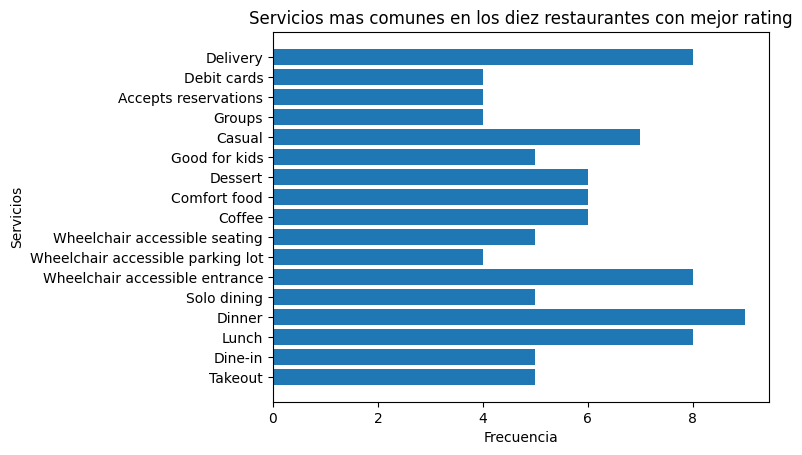

In [28]:
def count_occurrences(data, counts):
    if isinstance(data, dict):
        for value in data.values():
            count_occurrences(value, counts)
    elif isinstance(data, list):
        for item in data:
            count_occurrences(item, counts)
    else:
        counts[data] += 1

# Contar las ocurrencias
value_counts = Counter()

# Iterar por cada valor de los diccionarios en la columna "MISC"
for row in df_rating['MISC']:
    if pd.notna(row):  # Verificar que el valor no sea NaN
        count_occurrences(row, value_counts)

# Filtrar keys con más de 5 repeticiones
filtered_counts = {key: count for key, count in value_counts.items() if count > 3}

keys = list(filtered_counts.keys())
counts = list(filtered_counts.values())

# Crear gráfico de barras horizontales
plt.barh(keys, counts)
plt.xlabel('Frecuencia')
plt.ylabel('Servicios')
plt.title('Servicios mas comunes en los diez restaurantes con mejor rating')
plt.show()

Grafico de los servicios mas comunes en los restaurantes de manera general

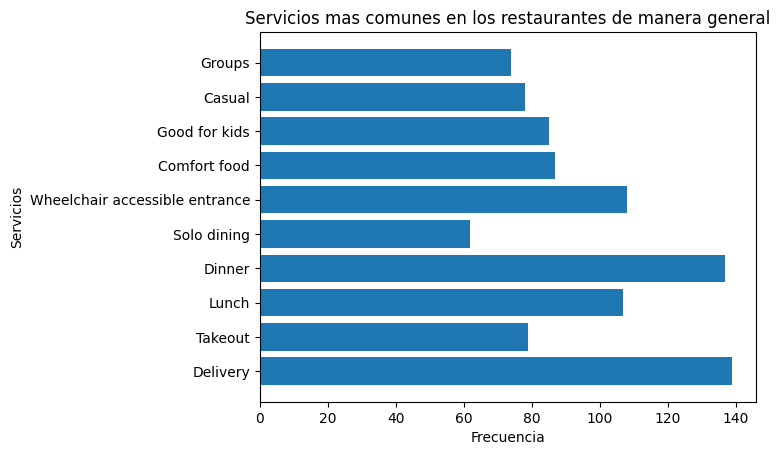

In [29]:
def count_occurrences(data, counts):
    if isinstance(data, dict):
        for value in data.values():
            count_occurrences(value, counts)
    elif isinstance(data, list):
        for item in data:
            count_occurrences(item, counts)
    else:
        counts[data] += 1

# Contar las ocurrencias
value_counts = Counter()

# Iterar por cada valor de los diccionarios en la columna "MISC"
for row in df_filtrado['MISC']:
    if pd.notna(row):  # Verificar que el valor no sea NaN
        count_occurrences(row, value_counts)

# Filtrar keys con más de 60 repeticiones
filtered_counts = {key: count for key, count in value_counts.items() if count > 60}

keys = list(filtered_counts.keys())
counts = list(filtered_counts.values())

# Crear gráfico de barras horizontales
plt.barh(keys, counts)
plt.xlabel('Frecuencia')
plt.ylabel('Servicios')
plt.title('Servicios mas comunes en los restaurantes de manera general')
plt.show()

Consulta y Grafico de la frecuencia de "abierto" por dia

In [30]:
def dias_diccionario(diccionario, fila):
    for dia, estado in fila:
        if estado.lower() == 'closed':
            diccionario[dia] -= 1
        else:
            diccionario[dia] += 1

# Crear el diccionario inicial con los días de la semana
dias_semana = ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']
diccionario = {dia: 0 for dia in dias_semana}

# Iterar por cada fila de la columna "hours" que no sea nula
for fila in df_filtrado.loc[pd.notnull(df_filtrado['hours']), 'hours']:
    dias_diccionario(diccionario, fila)

print(diccionario)

{'Tuesday': 88, 'Wednesday': 114, 'Thursday': 120, 'Friday': 120, 'Saturday': 114, 'Sunday': 76, 'Monday': 66}


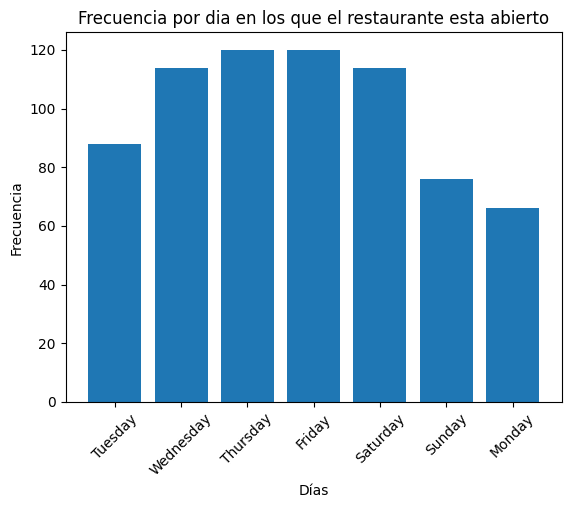

In [31]:
dias = list(diccionario.keys())
frecuencias = list(diccionario.values())

plt.bar(dias, frecuencias)
plt.xlabel("Días")
plt.ylabel("Frecuencia")
plt.title("Frecuencia por dia en los que el restaurante esta abierto")
plt.xticks(rotation=45)

plt.show()

## **Archivo 4**

## **Archivo 5**

## **Archivo 6**

## **Archivo 7**

## **Archivo 8**

## **Archivo 9**

## **Archivo 10**

## **Archivo 11**

In [32]:
# Leemos el documento "once" en formato json.
once = pd.read_json('/content/drive/MyDrive/Final Project /Google Maps/metadata-sitios/11.json', lines=True)

# Observamos el dataframe "dos" con las columnas y los datos que contienen.
once.sample(5)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
31861,CPL - Clinical Pathology Laboratories,"CPL - Clinical Pathology Laboratories, 4315 Ja...",0x8644b4b9d86182db:0x94a209d62351034f,None,30.223673,-97.774478,[Medical laboratory],3.0,78,None,"[[Wednesday, 7AM–3PM], [Thursday, 7AM–3PM], [F...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 3PM,"[0x8644cb2ad812c9df:0x32061a3753d1bf10, 0x8644...",https://www.google.com/maps/place//data=!4m2!3...
255107,Family Dollar,"Family Dollar, 56330 National Rd, Bridgeport, ...",0x8835d9add9b18f45:0x9d9a2e7bffa4f539,"Discount chain carrying a variety of goods, in...",40.069604,-80.765131,"[Dollar store, Clothing store, Discount store,...",4.2,53,$,"[[Monday, 8AM–10PM], [Tuesday, 8AM–10PM], [Wed...","{'Service options': ['In-store shopping', 'Del...",Open ⋅ Closes 10PM,"[0x8835d85388f0744d:0x4266c299aa905173, 0x8835...",https://www.google.com/maps/place//data=!4m2!3...
135818,Citadel Cathedral of Praise & Worship,"Citadel Cathedral of Praise & Worship, 105 Bar...",0x89c25c4acde9ed1d:0x4ca031a0ec13cda2,None,40.680661,-73.889252,[Church],4.6,17,None,None,None,None,"[0x89c25b2490c9ecbb:0x9fe8b23313d82396, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
28141,Hunter's Western Auto,"Hunter's Western Auto, 208 Trowbridge St, Alle...",0x8819decc8ca98505:0x229e30c41a401ea7,None,42.528806,-85.849654,[Bicycle repair shop],4.9,27,None,"[[Wednesday, Closed], [Thursday, Closed], [Fri...",None,Closed ⋅ Opens 9AM Fri,"[0x88179d71cbae49e3:0x46a7e64685ba82cd, 0x8819...",https://www.google.com/maps/place//data=!4m2!3...
246362,Miner's Outdoor & Rec,"Miner's Outdoor & Rec, 635 6th St SE, Blooming...",0x87f72904a58010a5:0xa242c1161bf6381c,None,43.860123,-93.046816,"[Golf cart dealer, Lawn mower store, Saw sharp...",4.7,35,None,"[[Monday, Closed], [Tuesday, 8AM–5:30PM], [Wed...","{'Service options': ['In-store pickup', 'In-st...",Closed ⋅ Opens 8AM Tue,"[0x87f6e60f1aefaf79:0xc5ebadda481723a4, 0x87f9...",https://www.google.com/maps/place//data=!4m2!3...


In [33]:
# Obtenemos la información del dataframe como los nombres de las columnas, los valores totales, si cuentan con nulos y los tipos de datos.
once.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274999 non-null  object 
 1   address           270246 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       37189 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          274019 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             42727 non-null   object 
 10  hours             218334 non-null  object 
 11  MISC              230490 non-null  object 
 12  state             222976 non-null  object 
 13  relative_results  256979 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


##**Comentarios:**
El dataframe cuenta con la columna "category" que nos parecen más relevante. Se realizó un filtrado de la columna "category" para conocer los términos englobados del rubro "steakhouse" y se contaron las filas del dataframe "once".

In [34]:
# Creamos una variable que nos brinde las categorías separadas.
categorias11= once['category'].dropna().explode()

# Incorporamos en la variable "categorias" los valores unicos de la columna "category".
categorias11 = pd.Series(categorias11.unique())

# Creamos una máscara que filtre los valores de "categorias" con las palabras claves para steakhouse.
mask11 = categorias11.str.contains('steak|bistec|beef', case=False)

# Aplicamos la máscara en la variable "categorias".
categorias11[mask11]

788                      Steak house
1512          Cheesesteak restaurant
1853             Japanese steakhouse
2954    French steakhouse restaurant
3561          Korean beef restaurant
dtype: object

In [35]:
# Convertimos los valores de la columna "category" en str.
once['category'] = once['category'].astype(str)

In [36]:
# Limpiamos los valores de la columna "category" eliminando los corchetes []
once['category'] = once['category'].str.replace(r'\[|\]', '', regex=True)

# Definimos los términos de búsqueda
terminos_steak11 = ['Cheesesteak restaurant', 'Steak house', 'Japanese steakhouse', 'French steakhouse restaurant','Korean beef restaurant']

# Creamos una expresión con los términos de búsqueda separados por el operador "|"
patron11= '|'.join(terminos_steak11)

# Buscamos los términos en la columna "category"
steakhouse11= once[once['category'].str.contains(patron11, regex=True)]

# Observamos el DataFrame con los valores filtrados
steakhouse11.sample(5)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
212140,Wawa,"Wawa, 5701 Northampton Blvd, Virginia Beach, V...",0x89ba969e0b1595db:0x40aa5bb359dff8ce,Convenience store chain known for sandwiches &...,36.885648,-76.179301,"'Convenience store', 'Breakfast restaurant', '...",3.9,205,$,"[[Tuesday, Open 24 hours], [Wednesday, Open 24...","{'Service options': ['Curbside pickup', 'No-co...",Open 24 hours,"[0x89ba969c66167b1f:0x82a6fefe523a8aaf, 0x89ba...",https://www.google.com/maps/place//data=!4m2!3...
130369,Circo TX,"Circo TX, 2619 McKinney Ave #120, Dallas, TX 7...",0x864e992e3e7f7b8d:0x499af676a7f2b58,Spin-off of NYC's Le Cirque offering pricy foo...,32.796982,-96.801900,"'Italian restaurant', 'Bar', 'Brunch restauran...",4.4,64,None,"[[Tuesday, Closed], [Wednesday, 5–10PM], [Thur...","{'Service options': ['Outdoor seating', 'Deliv...",Permanently closed,"[0x864e992f9450ea9d:0x4e125cfb47972eb5, 0x864e...",https://www.google.com/maps/place//data=!4m2!3...
64634,J.T.'s at the Lavalette House,"J.T.'s at the Lavalette House, 415 N Main St, ...",0x89b2ad208d5281fb:0x8582909aa41f3807,None,36.948391,-79.361244,"'Steak house', 'Food store', 'Lodging', 'Seafo...",4.4,108,None,None,{'Service options': ['Delivery']},None,"[0x89b2ad228e8e137b:0x883eb71363027f85, 0x89b2...",https://www.google.com/maps/place//data=!4m2!3...
208088,LongHorn Steakhouse,"LongHorn Steakhouse, 9050 SW 136th St, Miami, ...",0x88d9c755d7194aa5:0x44dc8bbcc953c4ce,None,25.646598,-80.338761,"'Steak house', 'Bar & grill', 'Barbecue restau...",4.7,115,None,"[[Tuesday, 11AM–10PM], [Wednesday, 11AM–10PM],...","{'Service options': ['Curbside pickup', 'Takeo...",Closed ⋅ Opens 11AM,None,https://www.google.com/maps/place//data=!4m2!3...
4179,American Deli,"30341 Georgia, Atlanta, Buckeye Rd, American Deli",0x88f5a79d718e8397:0x820f3d1cedccc045,Informal counter-serve chain offering hot wing...,33.885118,-84.257365,"'Chicken restaurant', 'American restaurant', '...",4.0,38,$,"[[Wednesday, 11AM–9PM], [Thursday, 11AM–9PM], ...","{'Service options': ['Takeout', 'Delivery', 'D...",Permanently closed,"[0x88f5038236211477:0x384c44c92ea6bbd2, 0x88f4...",https://www.google.com/maps/place//data=!4m2!3...


In [37]:
# Contamos las filas filtradas con las palabras claves.
steakhouse11.shape[0]

489